<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-ML/blob/main/AA_Supervised_Learning_Ess_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Supervised Learning Essential Training**

####**Linkedin Learning**

In [1]:
# numpy and pandas help us load and manipulate data
import numpy as np
import pandas as pd

# matplotlib and seaborn are used to plot data
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn has many machine learning algorithms
from sklearn.linear_model import LinearRegression

# this helps split data for modeling
from sklearn.model_selection import train_test_split

####**Prep data for modeling**

In [3]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder 

In [4]:
# Read in the data from the data folder
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Datasets/LinkedinDS/SLET

Mounted at /content/drive/
/content/drive/My Drive/Datasets/LinkedinDS/SLET


In [5]:
student1 = pd.read_csv("student-mat.csv", sep = ';', header = 0)
student2 = pd.read_csv("student-por.csv", sep = ';', header = 0)

In [6]:
student1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
student2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [9]:
students = pd.concat([student1,student2])

In [10]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [11]:
# Print shape of dataset
print(students.shape)

(1044, 33)


In [13]:
# Check for missing data
total = students.isnull().sum().sort_values(ascending=False)
# Display total
print(total)


school        0
paid          0
G2            0
G1            0
absences      0
health        0
Walc          0
Dalc          0
goout         0
freetime      0
famrel        0
romantic      0
internet      0
higher        0
nursery       0
activities    0
famsup        0
sex           0
schoolsup     0
failures      0
studytime     0
traveltime    0
guardian      0
reason        0
Fjob          0
Mjob          0
Fedu          0
Medu          0
Pstatus       0
famsize       0
address       0
age           0
G3            0
dtype: int64


In [16]:
round(students.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
age,1044.0,16.73,1.24,15.0,16.0,17.0,18.0,22.0
Medu,1044.0,2.60,1.12,0.0,2.0,3.0,4.0,4.0
Fedu,1044.0,2.39,1.10,0.0,1.0,2.0,3.0,4.0
traveltime,1044.0,1.52,0.73,1.0,1.0,1.0,2.0,4.0
studytime,1044.0,1.97,0.83,1.0,1.0,2.0,2.0,4.0
failures,1044.0,0.26,0.66,0.0,0.0,0.0,0.0,3.0
famrel,1044.0,3.94,0.93,1.0,4.0,4.0,5.0,5.0
freetime,1044.0,3.20,1.03,1.0,3.0,3.0,4.0,5.0
goout,1044.0,3.16,1.15,1.0,2.0,3.0,4.0,5.0
Dalc,1044.0,1.49,0.91,1.0,1.0,1.0,2.0,5.0


####**Describe dataset**

<ipython-input-19-54029c2113ef>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(students.corr(), cmap='Greens', annot=True, fmt='.2f')


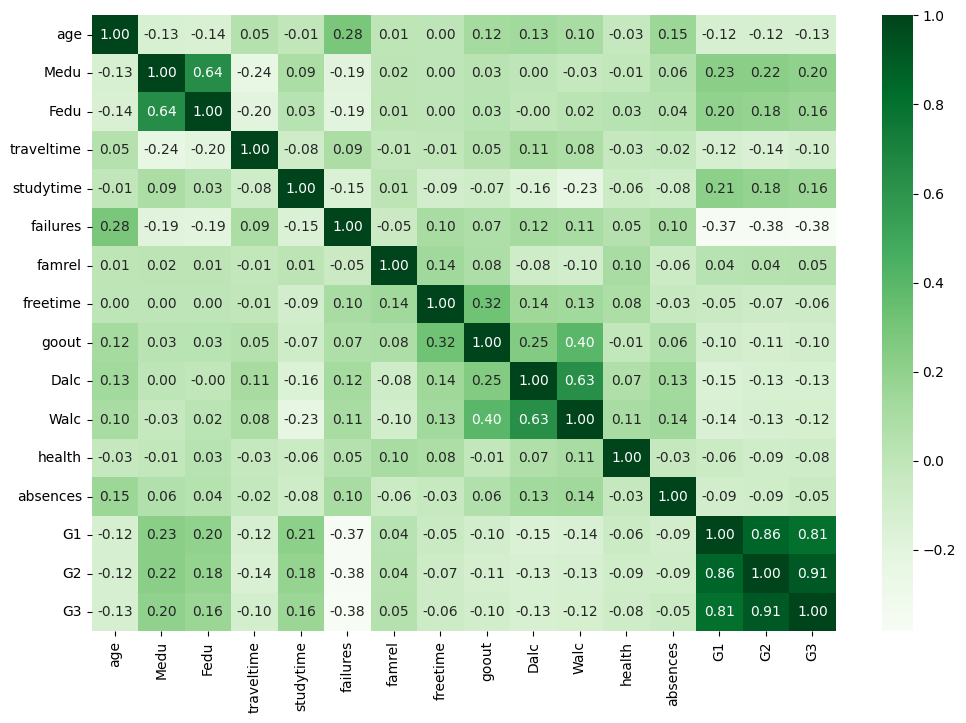

In [19]:
# Inspect feature correlations

plt.figure(figsize=(12,8))
ax = sns.heatmap(students.corr(), cmap='Greens', annot=True, fmt='.2f')
plt.show();

In [20]:
(students.shape)

(1044, 33)

In [21]:
students.corr()[['G3']].sort_values(by='G3', ascending = False)

<ipython-input-21-3880dbc251da>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  students.corr()[['G3']].sort_values(by='G3', ascending = False)


,G3
G3,1.000000
G2,0.910743
G1,0.809142
Medu,0.201472
studytime,0.161629
Fedu,0.159796
famrel,0.054461
absences,-0.045671
freetime,-0.064890
health,-0.080079


####**One hot encode labels**

In [22]:
encoded_students = OneHotEncoder().fit_transform(students).toarray()
print(encoded_students)

[[1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [23]:
(encoded_students.shape)

(1044, 192)

In [25]:
# Save encoded_students as pandas DataFrame
student_df = pd.DataFrame(encoded_students)
encoded_students.shape

(1044, 192)

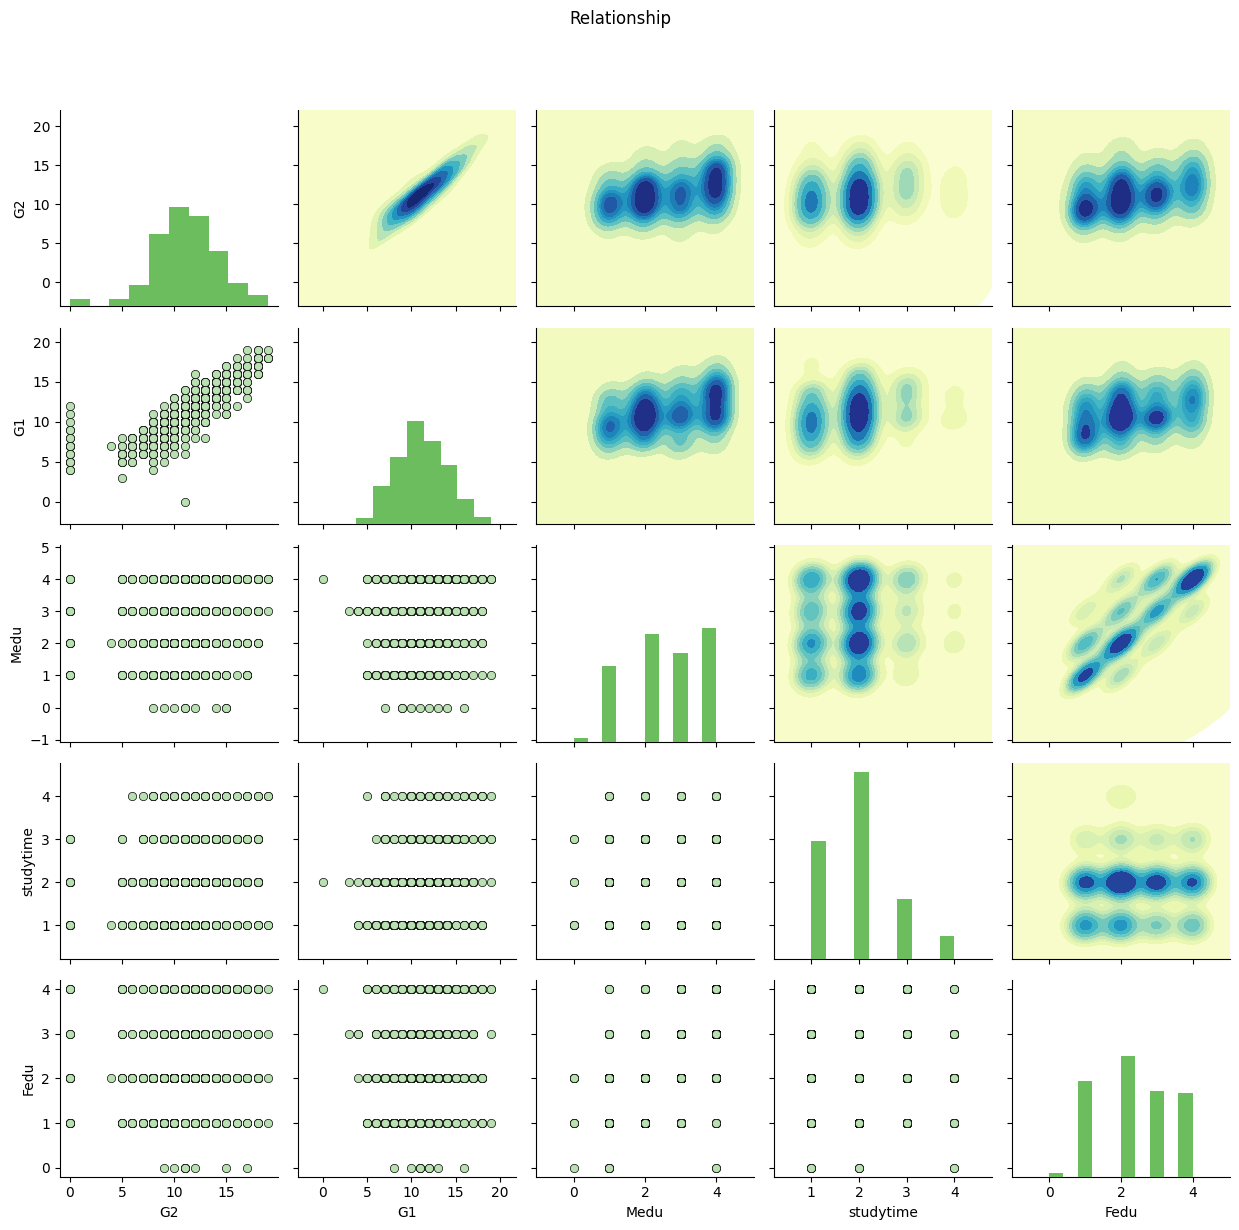

In [28]:
g = sns.PairGrid(students[['G2','G1','Medu','studytime', 'Fedu']])
g = g.map_upper(sns.kdeplot, cmap='YlGnBu', fill=True, thresh=False)
g = g.map_diag(plt.hist, color='#6cbd5e')
g = g.map_lower(sns.scatterplot, color='#b8e0b1', edgecolor='k')

g.fig.tight_layout()
g.fig.suptitle('Relationship')
plt.subplots_adjust(top=0.9);